In [1]:
import numpy as np
import itertools
import sklearn
import matplotlib

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

In [2]:
sklearn.__version__, matplotlib.__version__, np.__version__

('0.20.3', '2.1.0', '1.16.2')

In [3]:
# using random data for this exaple
X, y = make_classification(
    n_samples=10000, 
    n_features=25,
    n_informative=10,
    n_redundant=0,
    n_classes=5)

class_names = ['class-1','class-2','class-3','class-4','class-5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = XGBClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

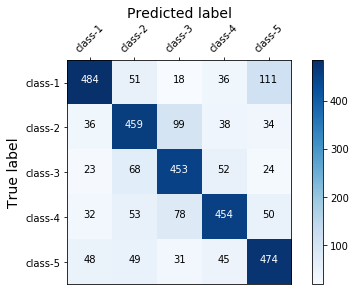

In [4]:
matrix = confusion_matrix(y_test,y_pred)
   
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()
    
fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")
    
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()